In [702]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from matplotlib.pyplot import xticks

In [703]:
df = pd.read_excel('DA Activity Data.xlsx')

In [704]:
df.head()

,vcc_id,internal_id,voice_business_id,outcome_id,lead_created_at,final_outcome_at,is_converted
0,7517575,31241756,628,47,2019-08-20 15:31:11.243553+00:00,2019-08-22 16:11:07.279737+00:00,0
1,7517546,2332374,628,47,2019-08-20 15:28:37.614710+00:00,2019-08-22 16:12:32.859414+00:00,0
2,7464810,17342978,628,321,2019-08-16 17:03:27.889968+00:00,2019-08-22 00:31:10.833583+00:00,0
3,7542955,9757,601,541,2019-08-22 16:39:51.219909+00:00,2019-08-26 17:26:04.913863+00:00,0
4,7464809,22758386,628,213,2019-08-16 17:03:19.148043+00:00,2019-08-17 00:21:53.648282+00:00,1


In [705]:
df_temp = pd.read_excel('Outcome Mapping.xlsx')

In [706]:
df_temp.head()

,id,outcome_name
0,47,dnc_business
1,321,unresponsive
2,541,disqualified
3,213,qualified
4,401,qualified


In [707]:
df = pd.merge(df, df_temp, how='left', left_on='outcome_id', right_on='id')

In [708]:
df.head()

,vcc_id,internal_id,voice_business_id,outcome_id,lead_created_at,final_outcome_at,is_converted,id,outcome_name
0,7517575,31241756,628,47,2019-08-20 15:31:11.243553+00:00,2019-08-22 16:11:07.279737+00:00,0,47,dnc_business
1,7517546,2332374,628,47,2019-08-20 15:28:37.614710+00:00,2019-08-22 16:12:32.859414+00:00,0,47,dnc_business
2,7464810,17342978,628,321,2019-08-16 17:03:27.889968+00:00,2019-08-22 00:31:10.833583+00:00,0,321,unresponsive
3,7542955,9757,601,541,2019-08-22 16:39:51.219909+00:00,2019-08-26 17:26:04.913863+00:00,0,541,disqualified
4,7464809,22758386,628,213,2019-08-16 17:03:19.148043+00:00,2019-08-17 00:21:53.648282+00:00,1,213,qualified


In [709]:
df = df.drop(['id'],axis=1)

In [710]:
df.head()

,vcc_id,internal_id,voice_business_id,outcome_id,lead_created_at,final_outcome_at,is_converted,outcome_name
0,7517575,31241756,628,47,2019-08-20 15:31:11.243553+00:00,2019-08-22 16:11:07.279737+00:00,0,dnc_business
1,7517546,2332374,628,47,2019-08-20 15:28:37.614710+00:00,2019-08-22 16:12:32.859414+00:00,0,dnc_business
2,7464810,17342978,628,321,2019-08-16 17:03:27.889968+00:00,2019-08-22 00:31:10.833583+00:00,0,unresponsive
3,7542955,9757,601,541,2019-08-22 16:39:51.219909+00:00,2019-08-26 17:26:04.913863+00:00,0,disqualified
4,7464809,22758386,628,213,2019-08-16 17:03:19.148043+00:00,2019-08-17 00:21:53.648282+00:00,1,qualified


In [711]:
df['lead_created_at'] = df['lead_created_at'].astype('datetime64[ns]') 
df['final_outcome_at'] = df['final_outcome_at'].astype('datetime64[ns]') 

In [712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19139 entries, 0 to 19138
Data columns (total 8 columns):
vcc_id               19139 non-null int64
internal_id          19139 non-null object
voice_business_id    19139 non-null int64
outcome_id           19139 non-null int64
lead_created_at      19139 non-null datetime64[ns]
final_outcome_at     19139 non-null datetime64[ns]
is_converted         19139 non-null int64
outcome_name         19038 non-null object
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 1.3+ MB


In [713]:
df = df.drop(['outcome_id'],axis=1)

In [714]:
df = df.sort_values(['vcc_id'], ascending=[True])

In [715]:
df.head()

,vcc_id,internal_id,voice_business_id,lead_created_at,final_outcome_at,is_converted,outcome_name
1310,7003570,39006716,604,2019-07-01 15:56:16.046540,2019-07-04 00:50:11.144974,0,disqualified
1315,7003571,24904299,604,2019-07-01 15:56:16.046738,2019-07-02 01:42:59.033732,0,disqualified
1302,7003572,37195457,604,2019-07-01 15:56:16.046866,2019-07-03 01:37:44.711225,0,disqualified
1298,7003573,29526166,604,2019-07-01 15:56:16.047006,2019-07-11 16:31:03.165592,0,unresponsive
1307,7003574,35735810,604,2019-07-01 15:56:16.047132,2019-07-02 22:11:26.864409,0,disqualified


In [716]:
df['outcome_name'] = df['outcome_name'].replace(np.nan, df['outcome_name'].mode()[0])



#### Because all null values in column is_converted is equal to 0 --------

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19139 entries, 1310 to 15870
Data columns (total 7 columns):
vcc_id               19139 non-null int64
internal_id          19139 non-null object
voice_business_id    19139 non-null int64
lead_created_at      19139 non-null datetime64[ns]
final_outcome_at     19139 non-null datetime64[ns]
is_converted         19139 non-null int64
outcome_name         19139 non-null object
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.2+ MB


In [718]:
df.columns

Index(['vcc_id', 'internal_id', 'voice_business_id', 'lead_created_at',
       'final_outcome_at', 'is_converted', 'outcome_name'],
      dtype='object')

In [719]:
df = df[['vcc_id', 'internal_id', 'outcome_name', 'voice_business_id', 'lead_created_at',
       'final_outcome_at', 'is_converted']]

In [720]:
df.head()

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted
1310,7003570,39006716,disqualified,604,2019-07-01 15:56:16.046540,2019-07-04 00:50:11.144974,0
1315,7003571,24904299,disqualified,604,2019-07-01 15:56:16.046738,2019-07-02 01:42:59.033732,0
1302,7003572,37195457,disqualified,604,2019-07-01 15:56:16.046866,2019-07-03 01:37:44.711225,0
1298,7003573,29526166,unresponsive,604,2019-07-01 15:56:16.047006,2019-07-11 16:31:03.165592,0
1307,7003574,35735810,disqualified,604,2019-07-01 15:56:16.047132,2019-07-02 22:11:26.864409,0


In [721]:
#### Checking for Duplicates

print("voice_business_id : " + str(any(df['voice_business_id'].duplicated())))  
print("internal_id : " + str(any(df['internal_id'].duplicated())))  
print("vcc_id : " + str(any(df['vcc_id'].duplicated())))
print("lead_created_at : " + str(any(df['lead_created_at'].duplicated())))  
print("final_outcome_at : " + str(any(df['final_outcome_at'].duplicated())))

voice_business_id : True
internal_id : True
vcc_id : False
lead_created_at : False
final_outcome_at : True


#### There are duplicate values present in internal_id
<br>
Upon Checking it was found that the same internal_id leads were assigned to different voice_business_id, by this some leads got generated, some didn't

In [722]:
df.loc[df['voice_business_id'] == 655]

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted
9934,7762364,25758,disqualified,655,2019-09-12 18:10:20.580194,2019-09-12 18:37:26.296162,0
9935,7762370,25625,disqualified,655,2019-09-12 18:10:50.455188,2019-09-12 18:40:16.760794,0
15523,7762371,25478,unresponsive,655,2019-09-12 18:10:55.558735,2019-09-18 12:40:13.113750,0
10195,7762375,24588,disqualified,655,2019-09-12 18:11:10.637093,2019-09-16 15:50:09.871470,0
10196,7762378,24469,disqualified,655,2019-09-12 18:11:15.726330,2019-09-17 14:11:02.814747,0
10197,7762379,24300,disqualified,655,2019-09-12 18:11:20.814444,2019-09-13 19:27:02.567696,0
9944,7762380,24287,disqualified,655,2019-09-12 18:11:25.877865,2019-09-12 19:39:28.951815,0
10194,7762385,23866,unresponsive,655,2019-09-12 18:11:41.111027,2019-09-18 12:40:15.252739,0
16578,7770328,25703,disqualified,655,2019-09-13 14:44:29.636196,2019-09-17 13:10:25.273815,0
16604,7770336,24573,disqualified,655,2019-09-13 14:44:54.950792,2019-09-16 16:10:14.489747,0


#### There were duplicate values for internal_id, 271 ids were found to be duplicate, 266 of them had is_converted value as 0 and the rest 5 were , so the duplicates with 0 value were removed and only 5 were retained.

In [723]:
ids = df["internal_id"]
df[ids.isin(ids[ids.duplicated()])].head()

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted
4412,7003675,8851,unresponsive,601,2019-07-01 16:32:37.433504,2019-07-10 17:32:16.842162,0
13648,7003697,5860,unresponsive,601,2019-07-01 16:35:52.162242,2019-08-15 12:30:52.344315,0
673,7003805,31277,unresponsive,590,2019-07-01 17:10:12.167924,2019-07-12 18:57:38.846872,0
6325,7003821,31378,disqualified,590,2019-07-01 17:12:57.382816,2019-07-12 03:17:42.283469,0
1373,7003830,31091,disqualified,590,2019-07-01 17:14:18.493104,2019-07-11 14:54:40.615514,0


In [724]:
x = df[df['internal_id'].duplicated() == True]

In [725]:
y = x.loc[x['is_converted'] == 1]

In [726]:
y

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted
6165,7356952,9691,qualified,630,2019-08-01 18:10:53.305087,2019-08-05 08:35:49.153225,1
12695,7393795,29107,qualified,564,2019-08-07 16:48:47.590922,2019-08-09 02:05:45.123634,1
15398,7494049,9523,qualified,601,2019-08-18 14:38:31.182354,2019-08-19 22:29:15.807063,1
16411,7633509,11843,qualified,630,2019-08-30 15:33:39.137279,2019-08-31 01:37:36.781876,1
8796,7670026,29765,qualified,564,2019-09-04 17:13:25.985559,2019-09-04 21:57:57.273065,1


In [727]:
x.head()

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted
2234,7153158,31091,disqualified,586,2019-07-12 14:28:43.565794,2019-07-18 19:34:16.802696,0
2248,7153188,31330,disqualified,586,2019-07-12 14:30:51.458451,2019-07-16 17:46:58.431799,0
2161,7153189,31228,unresponsive,586,2019-07-12 14:30:55.755777,2019-07-19 19:31:41.752391,0
3000,7181046,31175,unresponsive,590,2019-07-16 14:01:49.532364,2019-07-23 16:34:59.748028,0
2491,7191896,1411,disqualified,590,2019-07-17 14:25:08.460599,2019-07-18 00:13:59.366713,0


In [728]:
df.head()

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted
1310,7003570,39006716,disqualified,604,2019-07-01 15:56:16.046540,2019-07-04 00:50:11.144974,0
1315,7003571,24904299,disqualified,604,2019-07-01 15:56:16.046738,2019-07-02 01:42:59.033732,0
1302,7003572,37195457,disqualified,604,2019-07-01 15:56:16.046866,2019-07-03 01:37:44.711225,0
1298,7003573,29526166,unresponsive,604,2019-07-01 15:56:16.047006,2019-07-11 16:31:03.165592,0
1307,7003574,35735810,disqualified,604,2019-07-01 15:56:16.047132,2019-07-02 22:11:26.864409,0


In [729]:
z = pd.merge(df,x, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [730]:
z.head()

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted
0,7003570,39006716,disqualified,604,2019-07-01 15:56:16.046540,2019-07-04 00:50:11.144974,0
1,7003571,24904299,disqualified,604,2019-07-01 15:56:16.046738,2019-07-02 01:42:59.033732,0
2,7003572,37195457,disqualified,604,2019-07-01 15:56:16.046866,2019-07-03 01:37:44.711225,0
3,7003573,29526166,unresponsive,604,2019-07-01 15:56:16.047006,2019-07-11 16:31:03.165592,0
4,7003574,35735810,disqualified,604,2019-07-01 15:56:16.047132,2019-07-02 22:11:26.864409,0


In [731]:
z.shape

(18868, 7)

In [732]:
x.shape

(271, 7)

In [733]:
frames = [z, y]

result = pd.concat(frames)

In [734]:
result.shape

(18873, 7)

In [735]:
df2 = result

In [736]:
df2.shape

(18873, 7)

In [737]:
df2.describe()

,vcc_id,voice_business_id,is_converted
count,1.887300e+04,18873.000000,18873.000000
mean,7.414384e+06,601.651301,0.038415
std,2.110521e+05,29.251334,0.192200
min,7.003570e+06,470.000000,0.000000
25%,7.238686e+06,586.000000,0.000000
50%,7.415849e+06,608.000000,0.000000
75%,7.609776e+06,619.000000,0.000000
max,7.771396e+06,656.000000,1.000000


In [738]:
df2.head()

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted
0,7003570,39006716,disqualified,604,2019-07-01 15:56:16.046540,2019-07-04 00:50:11.144974,0
1,7003571,24904299,disqualified,604,2019-07-01 15:56:16.046738,2019-07-02 01:42:59.033732,0
2,7003572,37195457,disqualified,604,2019-07-01 15:56:16.046866,2019-07-03 01:37:44.711225,0
3,7003573,29526166,unresponsive,604,2019-07-01 15:56:16.047006,2019-07-11 16:31:03.165592,0
4,7003574,35735810,disqualified,604,2019-07-01 15:56:16.047132,2019-07-02 22:11:26.864409,0


In [739]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18873 entries, 0 to 8796
Data columns (total 7 columns):
vcc_id               18873 non-null int64
internal_id          18873 non-null object
outcome_name         18873 non-null object
voice_business_id    18873 non-null int64
lead_created_at      18873 non-null datetime64[ns]
final_outcome_at     18873 non-null datetime64[ns]
is_converted         18873 non-null int64
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 1.2+ MB


In [740]:
df2 = df2.sort_values(['vcc_id'], ascending=[True])

##### Major assumption where internal id was same I checked for positives and discarded the negatives.
##### So from 271 duplicate values only 266 were removed and the rest 5 were kept because they had positive values

## Data Visualizations

In [741]:
df2['created_month'] = df2['lead_created_at'].dt.month

In [742]:
subset1 = df2[((df2['created_month'] == 7))]

In [743]:
subset1.shape

(7253, 8)

In [744]:
subset2 = df2[((df2['created_month'] == 8))]

In [745]:
subset2.shape

(8324, 8)

In [746]:
subset3 = df2[((df2['created_month'] == 9))]
subset3.shape

(3296, 8)

In [747]:
subset4 = df2[((df2['created_month'] == 7)&(df2['is_converted'] == 1))]
print(subset4.shape)
subset5 = df2[((df2['created_month'] == 8)&(df2['is_converted'] == 1))]
print(subset5.shape)
subset6 = df2[((df2['created_month'] == 9)&(df2['is_converted'] == 1))]
print(subset6.shape)

(291, 8)
(309, 8)
(125, 8)


### From the above calculation we find that:

Leads Generated in July: 7253<br>
Leads Converted in July: 291<br>

Leads Generated in August: 8324<br>
Leads Converted in August: 309<br>

Leads Generated in September: 3296<br>
Leads Converted in September: 125<br>


In [748]:
df2.head()

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted,created_month
0,7003570,39006716,disqualified,604,2019-07-01 15:56:16.046540,2019-07-04 00:50:11.144974,0,7
1,7003571,24904299,disqualified,604,2019-07-01 15:56:16.046738,2019-07-02 01:42:59.033732,0,7
2,7003572,37195457,disqualified,604,2019-07-01 15:56:16.046866,2019-07-03 01:37:44.711225,0,7
3,7003573,29526166,unresponsive,604,2019-07-01 15:56:16.047006,2019-07-11 16:31:03.165592,0,7
4,7003574,35735810,disqualified,604,2019-07-01 15:56:16.047132,2019-07-02 22:11:26.864409,0,7


Text(0.5,0.98,'All Possible Outcome')

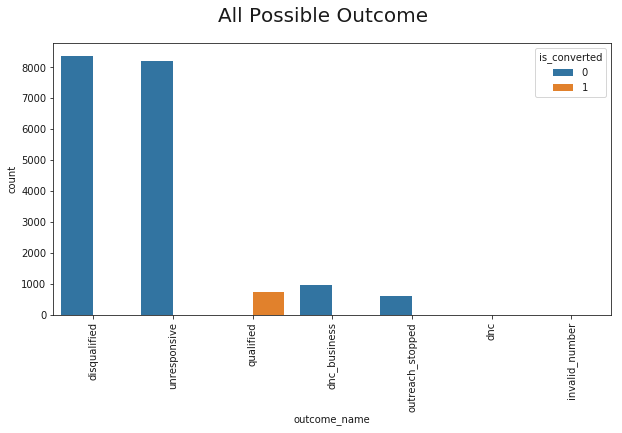

In [749]:
plt.figure(figsize=(10,5))
sns.countplot(x = "outcome_name", hue = "is_converted", data = df2)
xticks(rotation = 90)
plt.suptitle('All Possible Outcome', fontsize=20)

#### All Possible Outcome contains ~8000 Approx leads marked as disqualified, ~8000 Approx leads marked as unresponsive.

Text(0.5,0.98,'All Possible Outcome July')

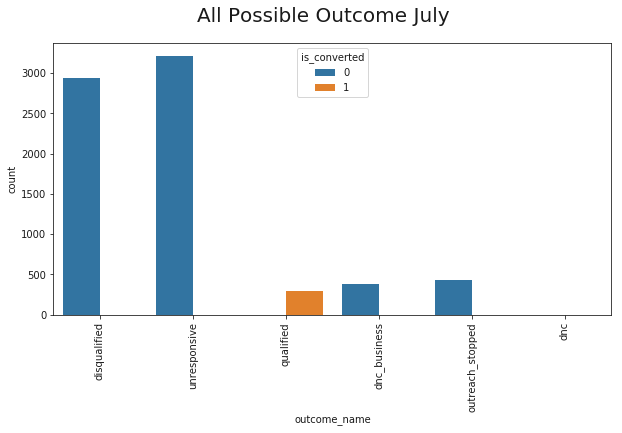

In [750]:
plt.figure(figsize=(10,5))
sns.countplot(x = "outcome_name", hue = "is_converted", data = df2[((df2['created_month'] == 7))])
xticks(rotation = 90)
plt.suptitle('All Possible Outcome July', fontsize=20)

Text(0.5,0.98,'All Possible Outcome August')

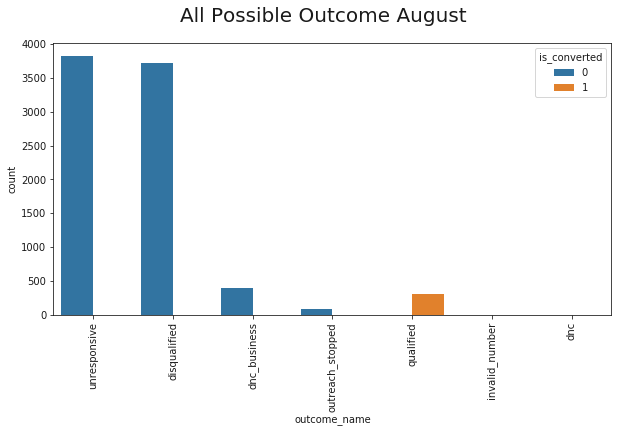

In [751]:
plt.figure(figsize=(10,5))
sns.countplot(x = "outcome_name", hue = "is_converted", data = df2[((df2['created_month'] == 8))])
xticks(rotation = 90)
plt.suptitle('All Possible Outcome August', fontsize=20)

Text(0.5,0.98,'All Possible Outcome September')

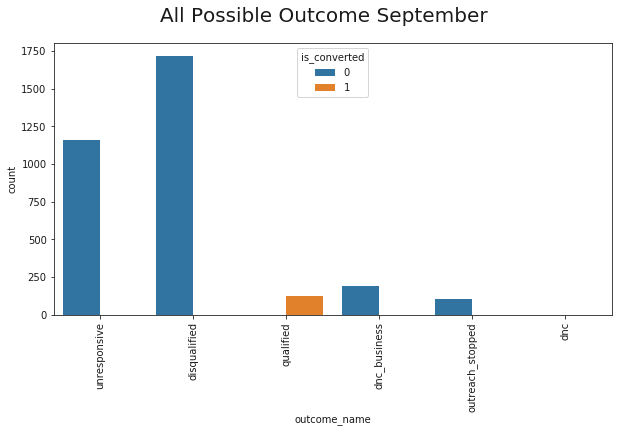

In [752]:
plt.figure(figsize=(10,5))
sns.countplot(x = "outcome_name", hue = "is_converted", data = df2[((df2['created_month'] == 9))])
xticks(rotation = 90)
plt.suptitle('All Possible Outcome September', fontsize=20)

#### From the above 3 plots we can see that invalid_number is only present in August. Also with each passing month the umber of disqualified leads is increasing.

## Business Id's Over the Month

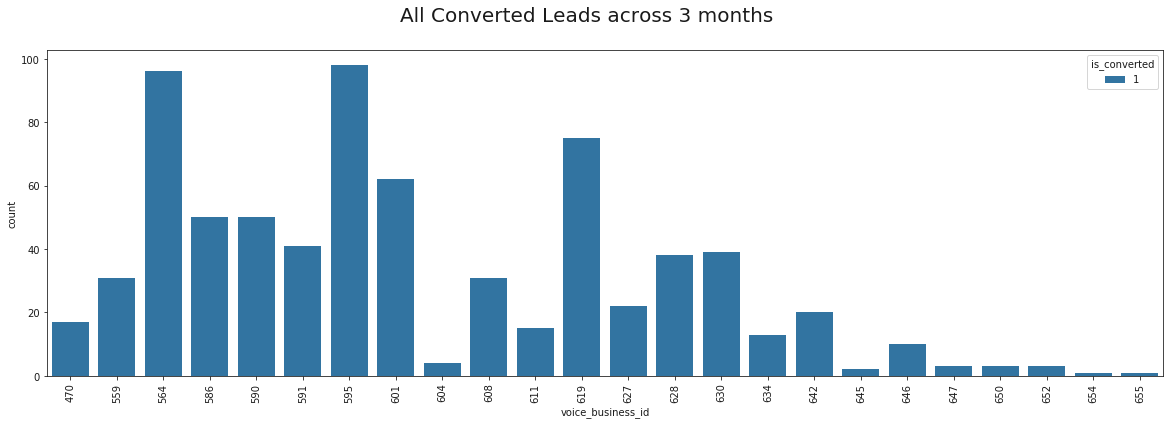

<Figure size 432x288 with 0 Axes>

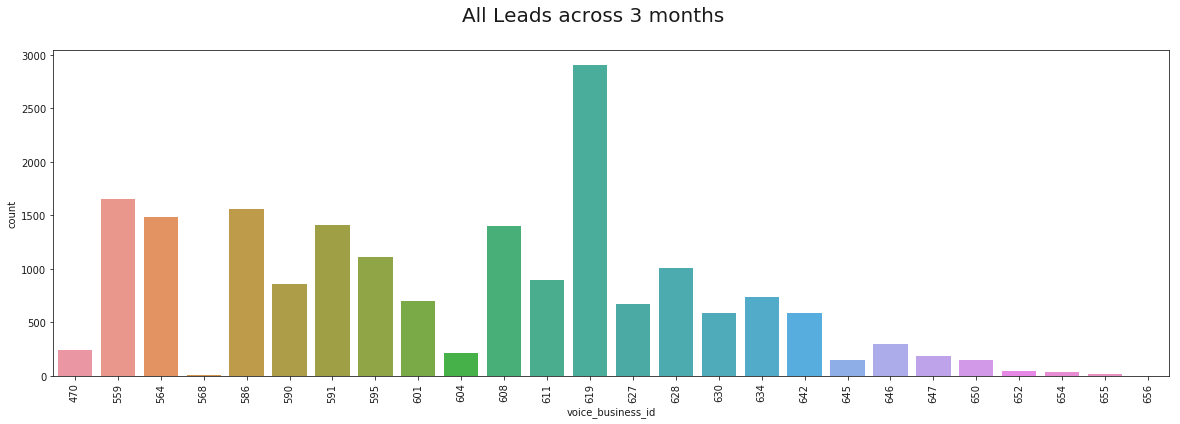

In [753]:
plt.figure(figsize=(20,6))

from matplotlib import interactive

plt.figure(1)

sns.countplot(x = "voice_business_id",hue='is_converted', data = df2[((df2['is_converted'] == 1))])
xticks(rotation = 90)
plt.suptitle('All Converted Leads across 3 months', fontsize=20)

interactive(True)
plt.show()


plt.figure(2)
plt.figure(figsize=(20,6))
sns.countplot(x = "voice_business_id", data = df2)
xticks(rotation = 90)
plt.suptitle('All Leads across 3 months', fontsize=20)
interactive(False)
plt.show()

#### Voice_Business_id's such as 564,595,619 have the highest conversions across 3 months. Top Leads are generated by id 619, but the conversion for that id is quite low. 
#### We can try to assign a few queries of business_id 619 to other higher performing ids. If that is at all possible, not sure how this data is being used.

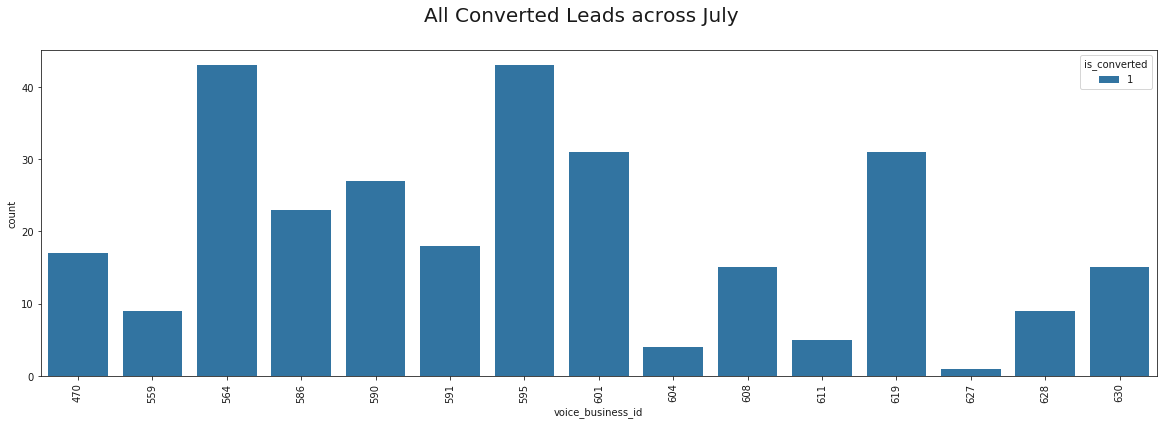

<Figure size 432x288 with 0 Axes>

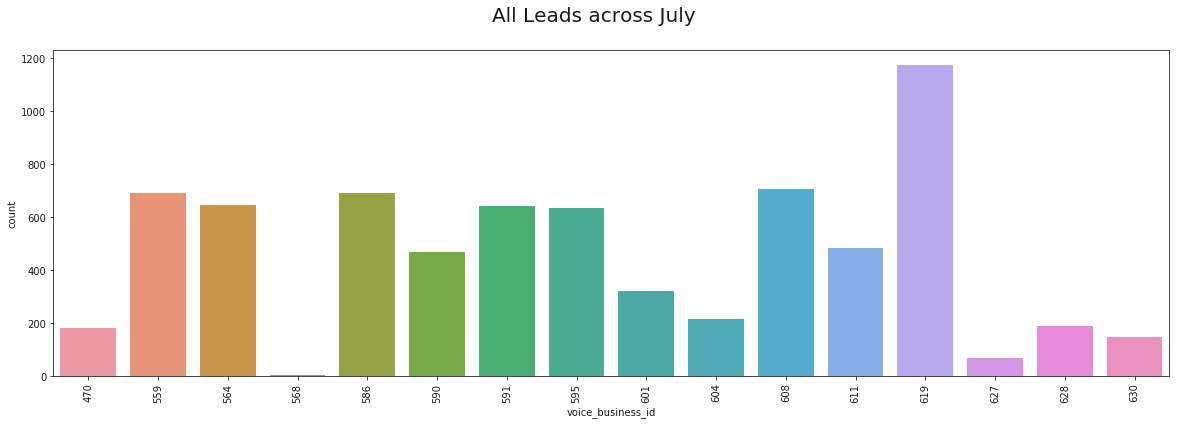

In [754]:
plt.figure(figsize=(20,6))

from matplotlib import interactive

plt.figure(1)

sns.countplot(x = "voice_business_id",hue='is_converted', data = df2[((df2['is_converted'] == 1)&(df2['created_month'] == 7))])
xticks(rotation = 90)
plt.suptitle('All Converted Leads across July', fontsize=20)

interactive(True)
plt.show()


plt.figure(2)
plt.figure(figsize=(20,6))
sns.countplot(x = "voice_business_id", data = df2[((df2['created_month'] == 7))])
xticks(rotation = 90)
plt.suptitle('All Leads across July', fontsize=20)
interactive(False)
plt.show()

#### Top performers of July are 564,595,619,601 with a number of conversions being more than or equal to 30.
#### Worst performers are 627,604,611 but just in terms of number of conversions

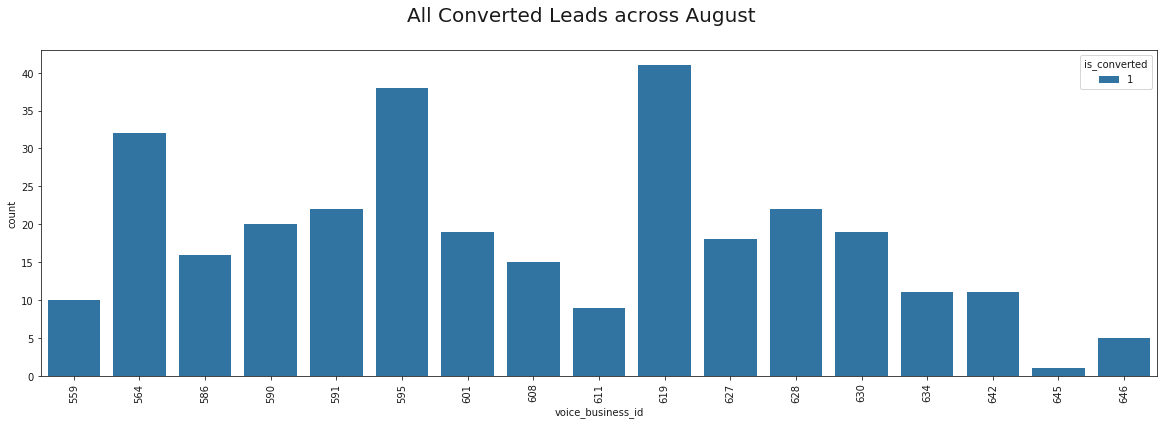

<Figure size 432x288 with 0 Axes>

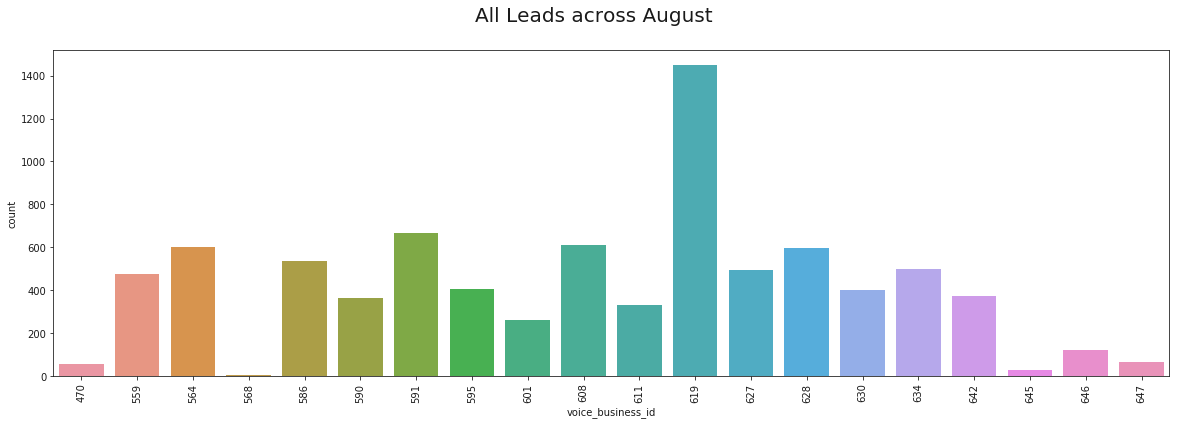

In [755]:
plt.figure(figsize=(20,6))

from matplotlib import interactive

plt.figure(1)

sns.countplot(x = "voice_business_id",hue='is_converted', data = df2[((df2['is_converted'] == 1)&(df2['created_month'] == 8))])
xticks(rotation = 90)
plt.suptitle('All Converted Leads across August', fontsize=20)

interactive(True)
plt.show()


plt.figure(2)
plt.figure(figsize=(20,6))
sns.countplot(x = "voice_business_id", data = df2[((df2['created_month'] == 8))])
xticks(rotation = 90)
plt.suptitle('All Leads across August', fontsize=20)
interactive(False)
plt.show()

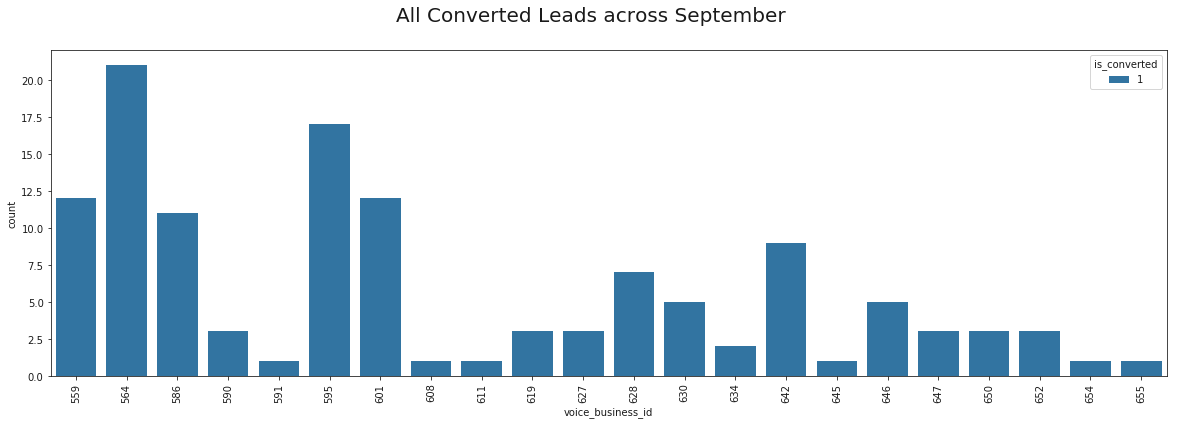

<Figure size 432x288 with 0 Axes>

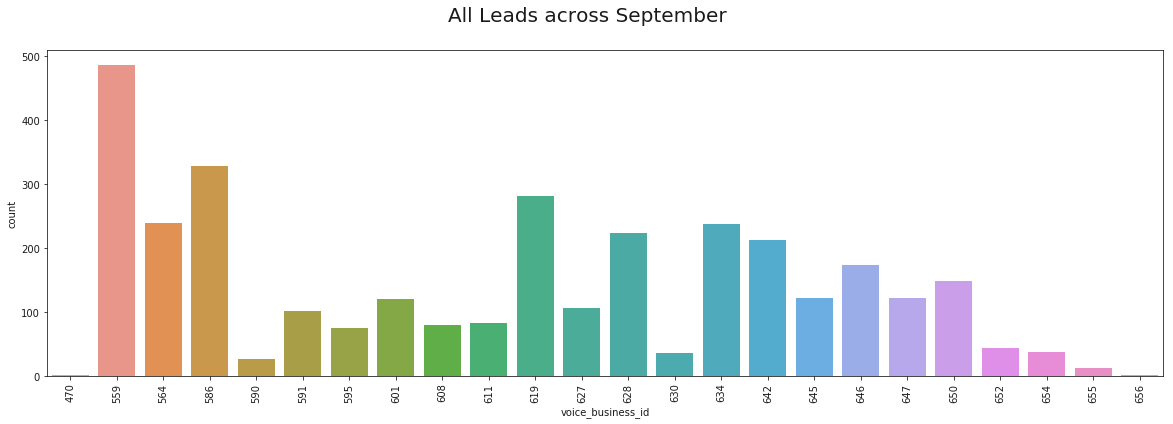

In [756]:
plt.figure(figsize=(20,6))

from matplotlib import interactive

plt.figure(1)

sns.countplot(x = "voice_business_id",hue='is_converted', data = df2[((df2['is_converted'] == 1)&(df2['created_month'] == 9))])
xticks(rotation = 90)
plt.suptitle('All Converted Leads across September', fontsize=20)

interactive(True)
plt.show()


plt.figure(2)
plt.figure(figsize=(20,6))
sns.countplot(x = "voice_business_id", data = df2[((df2['created_month'] == 9))])
xticks(rotation = 90)
plt.suptitle('All Leads across September', fontsize=20)
interactive(False)
plt.show()

In [757]:
conv_grouped_b_id = pd.pivot_table(ones, 
                       index='voice_business_id',
                                   columns='created_month',
                       aggfunc='count')

In [758]:
all_grouped_b_id = pd.pivot_table(df2, 
                       index='voice_business_id',  
                                  columns='created_month',
                       aggfunc='count')

In [759]:
conv_grouped_b_id.head()

created_date             created_hour              \
created_month                7     8     9            7     8     9   
voice_business_id                                                     
470                       17.0   NaN   NaN         17.0   NaN   NaN   
559                        9.0  10.0  12.0          9.0  10.0  12.0   
564                       43.0  32.0  21.0         43.0  32.0  21.0   
586                       23.0  16.0  11.0         23.0  16.0  11.0   
590                       27.0  20.0   3.0         27.0  20.0   3.0   

                  difference             final_outcome_at              \
created_month              7     8     9                7     8     9   
voice_business_id                                                       
470                     17.0   NaN   NaN             17.0   NaN   NaN   
559                      9.0  10.0  12.0              9.0  10.0  12.0   
564                     43.0  32.0  21.0             43.0  32.0  21.0   
586                     23.0  16.0  11.0             23.0  16.0  11.0   
590                     27.0  20.0   3.0             27.0  20.0   3.0   

                  internal_id             is_converted              \
created_month               7     8     9            7     8     9   
voice_business_id                                                    
470                      17.0   NaN   NaN         17.0   NaN   NaN   
559                       9.0  10.0  12.0          9.0  10.0  12.0   
564                      43.0  32.0  21.0         43.0  32.0  21.0   
586                      23.0  16.0  11.0         23.0  16.0  11.0   
590                      27.0  20.0   3.0         27.0  20.0   3.0   

                  lead_created_at             outcome_name             vcc_id  \
created_month                   7     8     9            7     8     9      7   
voice_business_id                                                               
470                          17.0   NaN   NaN         17.0   NaN   NaN   17.0   
559                           9.0  10.0  12.0          9.0  10.0  12.0    9.0   
564                          43.0  32.0  21.0         43.0  32.0  21.0   43.0   
586                          23.0  16.0  11.0         23.0  16.0  11.0   23.0   
590                          27.0  20.0   3.0         27.0  20.0   3.0   27.0   

                               
created_month         8     9  
voice_business_id              
470                 NaN   NaN  
559                10.0  12.0  
564                32.0  21.0  
586                16.0  11.0  
590                20.0   3.0

In [760]:
all_grouped_b_id.head()

final_outcome_at               internal_id                \
created_month                    7      8      9           7      8      9   
voice_business_id                                                            
470                          182.0   57.0    1.0       182.0   57.0    1.0   
559                          692.0  473.0  486.0       692.0  473.0  486.0   
564                          647.0  603.0  239.0       647.0  603.0  239.0   
568                            2.0    3.0    NaN         2.0    3.0    NaN   
586                          692.0  536.0  328.0       692.0  536.0  328.0   

                  is_converted               lead_created_at                \
created_month                7      8      9               7      8      9   
voice_business_id                                                            
470                      182.0   57.0    1.0           182.0   57.0    1.0   
559                      692.0  473.0  486.0           692.0  473.0  486.0   
564                      647.0  603.0  239.0           647.0  603.0  239.0   
568                        2.0    3.0    NaN             2.0    3.0    NaN   
586                      692.0  536.0  328.0           692.0  536.0  328.0   

                  outcome_name               vcc_id                
created_month                7      8      9      7      8      9  
voice_business_id                                                  
470                      182.0   57.0    1.0  182.0   57.0    1.0  
559                      692.0  473.0  486.0  692.0  473.0  486.0  
564                      647.0  603.0  239.0  647.0  603.0  239.0  
568                        2.0    3.0    NaN    2.0    3.0    NaN  
586                      692.0  536.0  328.0  692.0  536.0  328.0

In [761]:
conversion_ratio = conv_grouped_b_id['is_converted']/(all_grouped_b_id['is_converted'] + conv_grouped_b_id['is_converted'])*100

In [762]:
conversion_ratio.sort_values([7,8,9],ascending=False)

created_month,7,8,9
voice_business_id,,,
630,9.316770,4.513064,12.500000
601,8.781870,6.834532,9.090909
470,8.542714,NaN,NaN
595,6.360947,8.616780,18.681319
564,6.231884,5.039370,8.076923
590,5.476673,5.235602,10.344828
628,4.591837,3.554120,3.030303
586,3.216783,2.898551,3.244838
591,2.735562,3.197674,0.970874


In [763]:
conversion_ratio.columns = conversion_ratio.columns.get_level_values(0)

In [764]:
#conversion_ratio.loc[:, 7].sort_values(ascending = False)

In [765]:
conv_df = pd.DataFrame()

In [766]:
conv_df['voice_business_id'] = conversion_ratio.index

In [767]:
july = np.array(conversion_ratio[7])
august = np.array(conversion_ratio[8])
september = np.array(conversion_ratio[9])

In [768]:
conv_df['july'] = july
conv_df['august'] = august
conv_df['september'] = september

In [769]:
conv_df.sort_values(by='july',ascending = False)

,voice_business_id,july,august,september
15,630,9.316770,4.513064,12.500000
8,601,8.781870,6.834532,9.090909
0,470,8.542714,NaN,NaN
7,595,6.360947,8.616780,18.681319
2,564,6.231884,5.039370,8.076923
5,590,5.476673,5.235602,10.344828
14,628,4.591837,3.554120,3.030303
4,586,3.216783,2.898551,3.244838
6,591,2.735562,3.197674,0.970874
12,619,2.572614,2.751678,1.052632


In [770]:
conv_df = conv_df.astype('object')

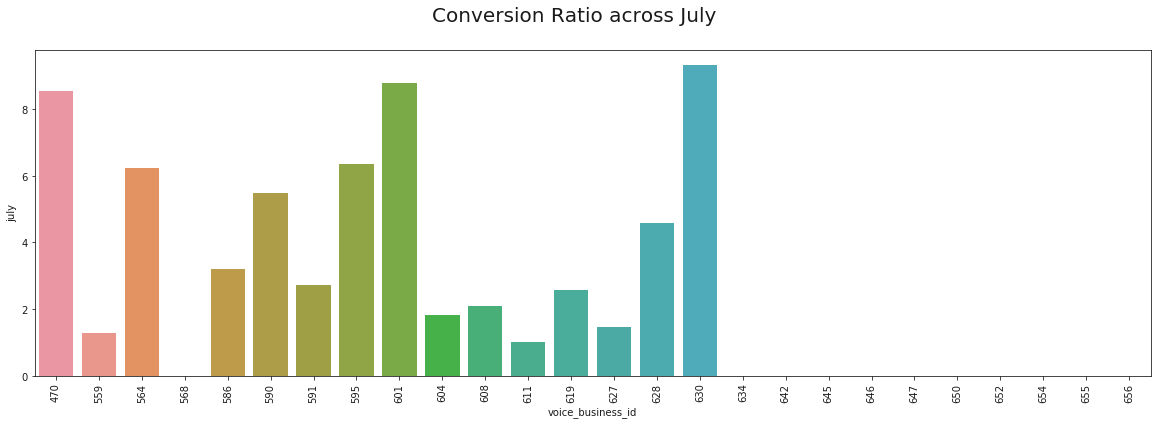

<Figure size 432x288 with 0 Axes>

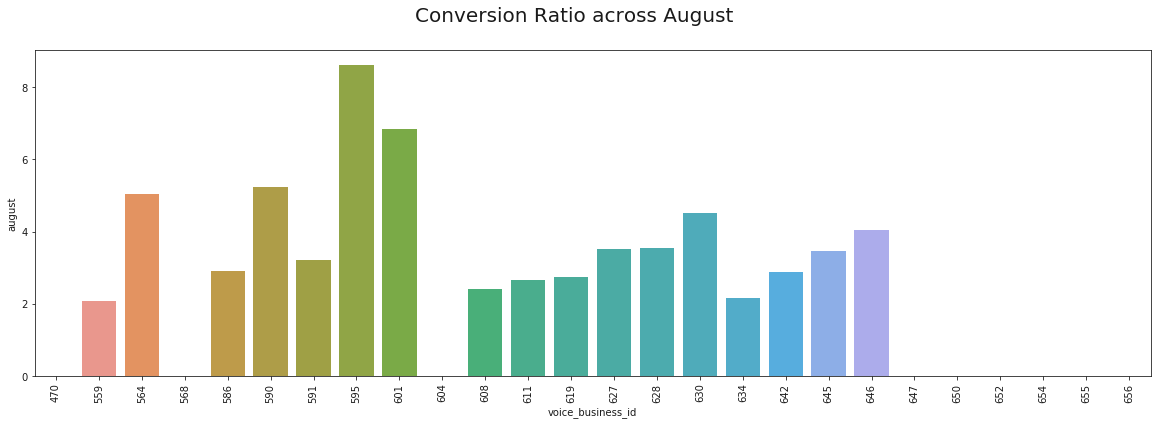

<Figure size 432x288 with 0 Axes>

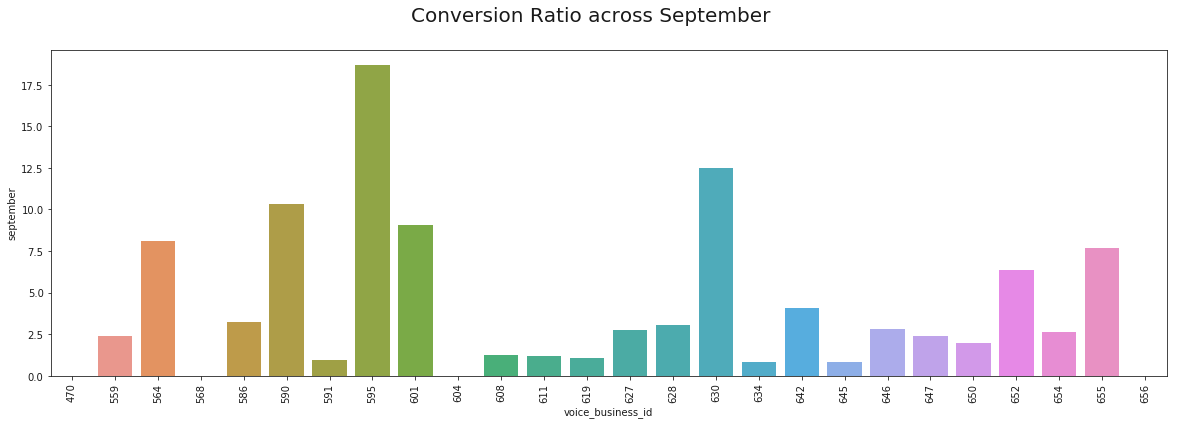

In [771]:
plt.figure(figsize=(20,6))

from matplotlib import interactive

plt.figure(1)

sns.barplot(x="voice_business_id", y="july", data=conv_df)
xticks(rotation = 90)
plt.suptitle('Conversion Ratio across July', fontsize=20)

interactive(True)
plt.show()


plt.figure(2)
plt.figure(figsize=(20,6))
sns.barplot(x="voice_business_id", y="august", data=conv_df)
xticks(rotation = 90)
plt.suptitle('Conversion Ratio across August', fontsize=20)
interactive(True)
plt.show()

plt.figure(3)
plt.figure(figsize=(20,6))
sns.barplot(x="voice_business_id", y="september", data=conv_df)
xticks(rotation = 90)
plt.suptitle('Conversion Ratio across September', fontsize=20)
interactive(False)
plt.show()

### Business_Id vs Conversion Ratio vs Month Observation:

#### July: 

- A lot of Business Ids are not present in the month of July like ids greater than 634.
- This could mean that these businessed were on boarded post July.
- Highest Conversion rate in July is from 630, 601, 470, even though they have lower number queries they are able to convert more amount of leads.

#### August:

- In the month of August some of the businessed were dropped that is the reason their queries are not listed in the charts such as: 568, 604, 470
- Now because the business 470 is not generating leads and converting them the conversion ratio dropped a bit. 
- Best business_ids where the conversion rate is high are: 595, 601, 630
- This indicates that 601, 630 are constantly maintaining their conversion trends.
- Some new businesses were onboarded whose ids are: 634, 642, 645, 656, these new ids show significant returns.

#### September:

- In the month of September some of the businessed were dropped that is the reason their queries are not listed in the charts such as: 568, 604, 470
- Now because the business 470 is not generating leads and converting them the conversion ratio dropped a bit. 
- Best Conversion rates are as follows: 595, 630, 590, 601. Most of these business have been performing consistently well in converting the leads even with a smaller number of leads.
- To increase the conversion rate we can possibly provide these businesses with more leads and also focus on their time interval to verify their leads and create a better response time.
- Some new businesses were onboarded whose ids are: 647, 650,652, 654, 655, these new ids have been performing well even when joining in the current month so are likely to perform better in the next couple of months.


#### 619 id which had a lot of conversions in the above analysis seems to phase out in this analysis, because this id was generating a lot of leads, but could only convert a handful. That is why it didn't come up in conversion rates.

#### Business Id 595 shows a lot of promise since it is constantly improving its conversion rate.


### We can say that in terms of number of Leads and the number of conversions the insights have gone down, but in terms of conversion ratio September has performed similar to the month of August even with very few leads and in September only the data for the first 13 days is considered, it is highly likely that if there were more leads spread across the month, the conversion would have definitely increased.

### All Leads vs Conversions vs Date Visualization

In [772]:
group_ones = pd.pivot_table(ones, 
                       index='created_date',  
                       aggfunc='count')

In [773]:
group_ones.head()

,created_hour,created_month,difference,final_outcome_at,internal_id,is_converted,lead_created_at,outcome_name,vcc_id,voice_business_id
created_date,,,,,,,,,,
2019-07-01,13,13,13,13,13,13,13,13,13,13
2019-07-02,7,7,7,7,7,7,7,7,7,7
2019-07-03,8,8,8,8,8,8,8,8,8,8
2019-07-05,7,7,7,7,7,7,7,7,7,7
2019-07-06,12,12,12,12,12,12,12,12,12,12


In [774]:
group_ones.columns = group_ones.columns.get_level_values(0)

In [775]:
group_ones.head()

,created_hour,created_month,difference,final_outcome_at,internal_id,is_converted,lead_created_at,outcome_name,vcc_id,voice_business_id
created_date,,,,,,,,,,
2019-07-01,13,13,13,13,13,13,13,13,13,13
2019-07-02,7,7,7,7,7,7,7,7,7,7
2019-07-03,8,8,8,8,8,8,8,8,8,8
2019-07-05,7,7,7,7,7,7,7,7,7,7
2019-07-06,12,12,12,12,12,12,12,12,12,12


In [776]:
group_zeroes = pd.pivot_table(zeroes, 
                       index='created_date',  
                       aggfunc='count')

In [777]:
group_zeroes.columns = group_zeroes.columns.get_level_values(0)

In [778]:
group_zeroes.head()

,created_hour,created_month,difference,final_outcome_at,internal_id,is_converted,lead_created_at,outcome_name,vcc_id,voice_business_id
created_date,,,,,,,,,,
2019-07-01,235,235,235,235,235,235,235,235,235,235
2019-07-02,205,205,205,205,205,205,205,205,205,205
2019-07-03,243,243,243,243,243,243,243,243,243,243
2019-07-04,3,3,3,3,3,3,3,3,3,3
2019-07-05,169,169,169,169,169,169,169,169,169,169


In [779]:
df2['created_date'] = df2['lead_created_at'].dt.date

In [780]:
all_grouped = pd.pivot_table(df2, 
                       index='created_date',  
                       aggfunc='count')

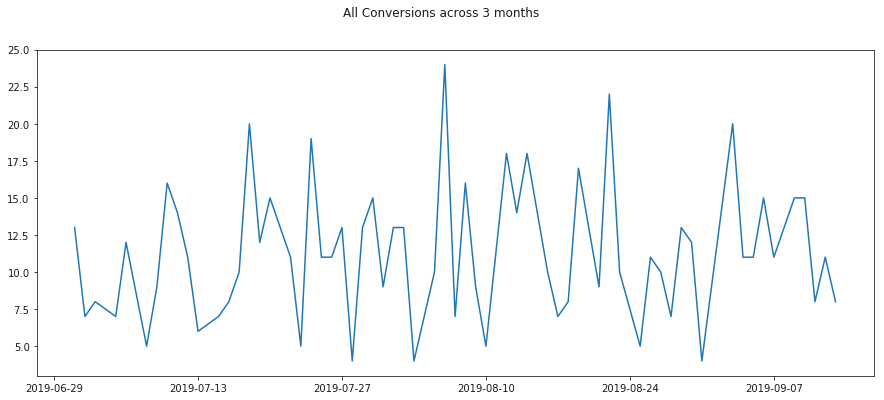

<Figure size 432x288 with 0 Axes>

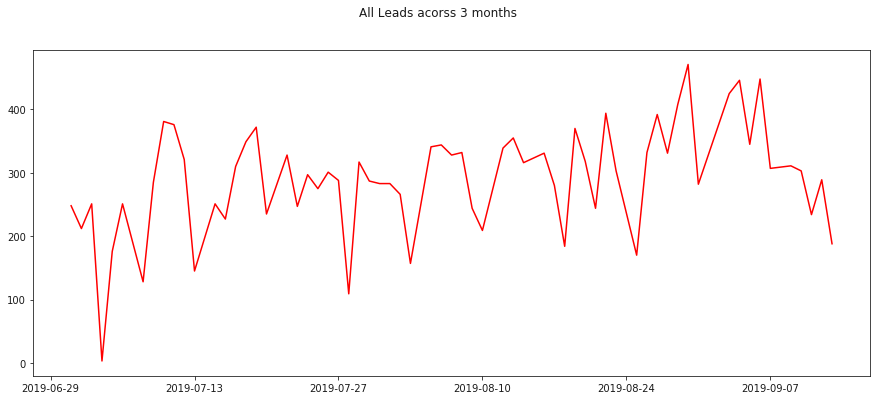

In [781]:
plt.figure(figsize=(15,6))

from matplotlib import interactive

plt.figure(1)
plt.plot(group_ones.index, group_ones.is_converted,label=1)
plt.suptitle("All Conversions across 3 months")

interactive(True)
plt.show()


plt.figure(2)
plt.figure(figsize=(15,6))
plt.plot(all_grouped.index, all_grouped.is_converted,label=2,color='red')
plt.suptitle("All Leads acorss 3 months")
interactive(False)
plt.show()

### From the above graph we can see that the number of leads have gone up day by day, but the number of conversions seem to be increasing in a very slow manner.

In [782]:
all_grouped_month = pd.pivot_table(df2, 
                       index='created_month',  
                       aggfunc='count')

In [783]:
all_grouped_month

,created_date,final_outcome_at,internal_id,is_converted,lead_created_at,outcome_name,vcc_id,voice_business_id
created_month,,,,,,,,
7,7253,7253,7253,7253,7253,7253,7253,7253
8,8324,8324,8324,8324,8324,8324,8324,8324
9,3296,3296,3296,3296,3296,3296,3296,3296


In [784]:
all_grouped_month_sum = pd.pivot_table(df2, 
                       index='created_month',  
                       aggfunc='sum')

In [785]:
all_grouped_month_sum

,is_converted,vcc_id,voice_business_id
created_month,,,
7,291,52140597051,4299025
8,309,62389671811,5047288
9,125,25401404595,2008652


In [786]:
all_grouped_month_sum.columns = all_grouped_month_sum.columns.get_level_values(0)
all_grouped_month.columns = all_grouped_month.columns.get_level_values(0)

## Percentage growth or drop in conversions

In [787]:
all_grouped_month_sum['is_converted']/all_grouped_month['is_converted']*100

created_month
7    4.012133
8    3.712158
9    3.792476
Name: is_converted, dtype: float64

### Percentage Growth across 3 Months:

- July: 4.01%
- August: 3.71%
- September: 3.79%

In [788]:
df2['created_hour'] = df2['lead_created_at'].dt.hour

In [789]:
all_grouped_hour_sum = pd.pivot_table(df2, 
                       index='created_hour',  
                       aggfunc='sum')

In [790]:
all_grouped_hour = pd.pivot_table(df2, 
                       index='created_hour',  
                       aggfunc='count')

### Patterns visible during which hour leads get generated and get converted

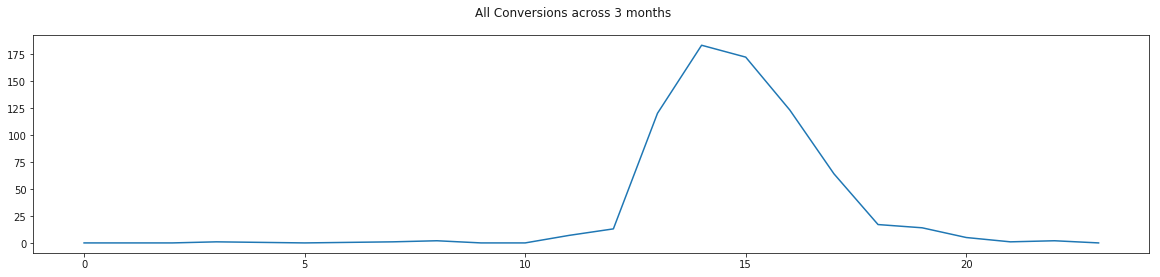

<Figure size 432x288 with 0 Axes>

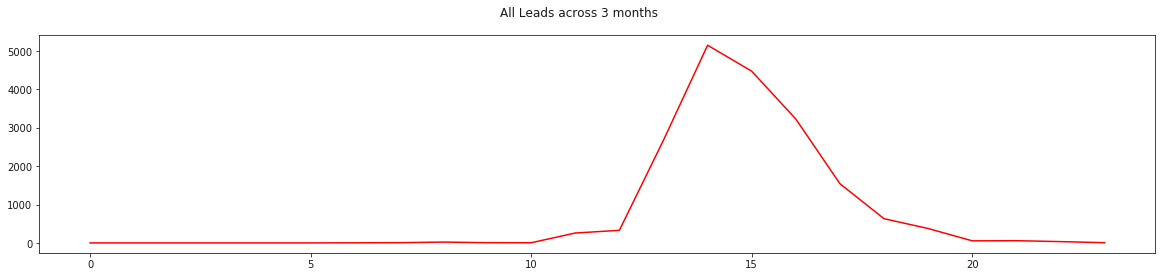

In [791]:
plt.figure(figsize=(20,4))

from matplotlib import interactive

plt.figure(1)
plt.plot(all_grouped_hour_sum.index, all_grouped_hour_sum.is_converted,label=1)
plt.suptitle("All Conversions across 3 months")

interactive(True)
plt.show()


plt.figure(2)
plt.figure(figsize=(20,4))
plt.plot(all_grouped_hour.index, all_grouped_hour.is_converted,label=2,color='red')
plt.suptitle("All Leads across 3 months")
interactive(False)
plt.show()

#### From the above graph we can see that almost all the leads get generated between 10 AM and 8 PM and the leads get converted between 12 Noon to between 6 PM. 

In [792]:
df2.head()

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted,created_month,created_date,created_hour
0,7003570,39006716,disqualified,604,2019-07-01 15:56:16.046540,2019-07-04 00:50:11.144974,0,7,2019-07-01,15
1,7003571,24904299,disqualified,604,2019-07-01 15:56:16.046738,2019-07-02 01:42:59.033732,0,7,2019-07-01,15
2,7003572,37195457,disqualified,604,2019-07-01 15:56:16.046866,2019-07-03 01:37:44.711225,0,7,2019-07-01,15
3,7003573,29526166,unresponsive,604,2019-07-01 15:56:16.047006,2019-07-11 16:31:03.165592,0,7,2019-07-01,15
4,7003574,35735810,disqualified,604,2019-07-01 15:56:16.047132,2019-07-02 22:11:26.864409,0,7,2019-07-01,15


In [793]:
df2['difference'] = df2['final_outcome_at'] - df2['lead_created_at']

In [794]:
df2['day_difference'] = df2['difference'].dt.days

In [795]:
df2.head()

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted,created_month,created_date,created_hour,difference,day_difference
0,7003570,39006716,disqualified,604,2019-07-01 15:56:16.046540,2019-07-04 00:50:11.144974,0,7,2019-07-01,15,2 days 08:53:55.098434,2
1,7003571,24904299,disqualified,604,2019-07-01 15:56:16.046738,2019-07-02 01:42:59.033732,0,7,2019-07-01,15,0 days 09:46:42.986994,0
2,7003572,37195457,disqualified,604,2019-07-01 15:56:16.046866,2019-07-03 01:37:44.711225,0,7,2019-07-01,15,1 days 09:41:28.664359,1
3,7003573,29526166,unresponsive,604,2019-07-01 15:56:16.047006,2019-07-11 16:31:03.165592,0,7,2019-07-01,15,10 days 00:34:47.118586,10
4,7003574,35735810,disqualified,604,2019-07-01 15:56:16.047132,2019-07-02 22:11:26.864409,0,7,2019-07-01,15,1 days 06:15:10.817277,1


In [796]:
all_grouped_day_diff_sum = pd.pivot_table(df2, 
                       index='day_difference',  
                       aggfunc='sum')

all_grouped_day_diff = pd.pivot_table(df2, 
                       index='day_difference',  
                       aggfunc='count')

In [797]:
all_grouped_day_diff.head()

,created_date,created_hour,created_month,difference,final_outcome_at,internal_id,is_converted,lead_created_at,outcome_name,vcc_id,voice_business_id
day_difference,,,,,,,,,,,
0,5635,5635,5635,5635,5635,5635,5635,5635,5635,5635,5635
1,1398,1398,1398,1398,1398,1398,1398,1398,1398,1398,1398
2,925,925,925,925,925,925,925,925,925,925,925
3,690,690,690,690,690,690,690,690,690,690,690
4,600,600,600,600,600,600,600,600,600,600,600


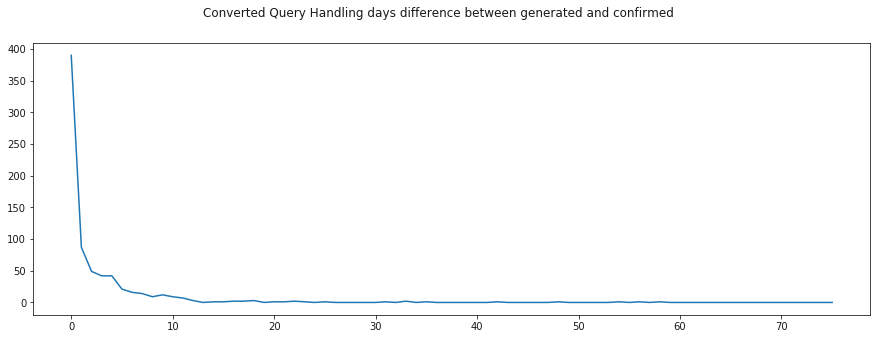

<Figure size 432x288 with 0 Axes>

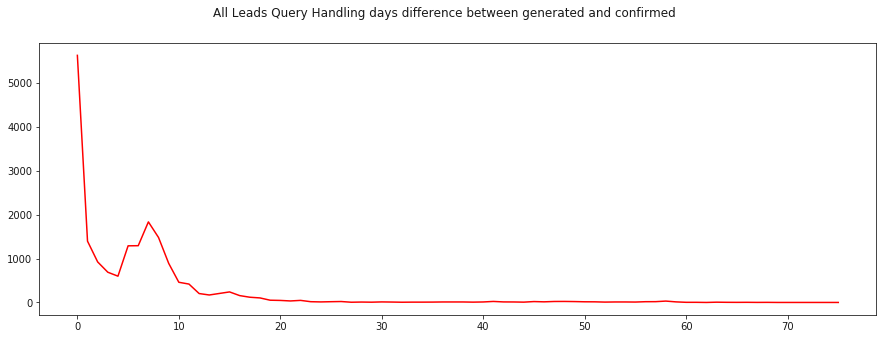

In [798]:
plt.figure(figsize=(15,5))

from matplotlib import interactive

plt.figure(1)
plt.plot(all_grouped_day_diff_sum.index, all_grouped_day_diff_sum.is_converted,label=1)
plt.suptitle("Converted Query Handling days difference between generated and confirmed")

interactive(True)
plt.show()


plt.figure(2)
plt.figure(figsize=(15,5))
plt.plot(all_grouped_day_diff.index, all_grouped_day_diff.is_converted,label=2,color='red')
plt.suptitle("All Leads Query Handling days difference between generated and confirmed")
interactive(False)
plt.show()

#### From the above graph we can see that a majority of leads get converted when they are handled the same day or the next day and the conversion rate drops exponentially from 1st day to 4th day and after that it becomes stagnant. 

#### We can also see from the second subplot that some leads get treated between 4-10days duration, we can evaluate this time interval to find out what business_ids are delaying with dealing with the leads.

#### Checking for discrepancy in the above surge between 5-10

In [799]:
subset = df2[((df2['day_difference'] > 4))]

In [800]:
subset.head()

,vcc_id,internal_id,outcome_name,voice_business_id,lead_created_at,final_outcome_at,is_converted,created_month,created_date,created_hour,difference,day_difference
3,7003573,29526166,unresponsive,604,2019-07-01 15:56:16.047006,2019-07-11 16:31:03.165592,0,7,2019-07-01,15,10 days 00:34:47.118586,10
5,7003575,36927569,unresponsive,604,2019-07-01 15:56:16.047257,2019-07-11 17:30:14.091337,0,7,2019-07-01,15,10 days 01:33:58.044080,10
10,7003580,8540991,unresponsive,604,2019-07-01 15:56:16.047879,2019-07-11 17:30:20.557251,0,7,2019-07-01,15,10 days 01:34:04.509372,10
11,7003581,1134965,dnc_business,604,2019-07-01 15:56:16.048004,2019-07-09 15:36:12.359862,0,7,2019-07-01,15,7 days 23:39:56.311858,7
12,7003582,32127680,disqualified,604,2019-07-01 15:56:16.048128,2019-07-11 18:16:36.583127,0,7,2019-07-01,15,10 days 02:20:20.534999,10


In [801]:
subset.shape

(9625, 12)

In [802]:
subset_b_id_sum = pd.pivot_table(subset, 
                       index='voice_business_id',
                       aggfunc='sum')

In [803]:
subset_b_id_count = pd.pivot_table(subset, 
                       index='voice_business_id',
                       aggfunc='count')

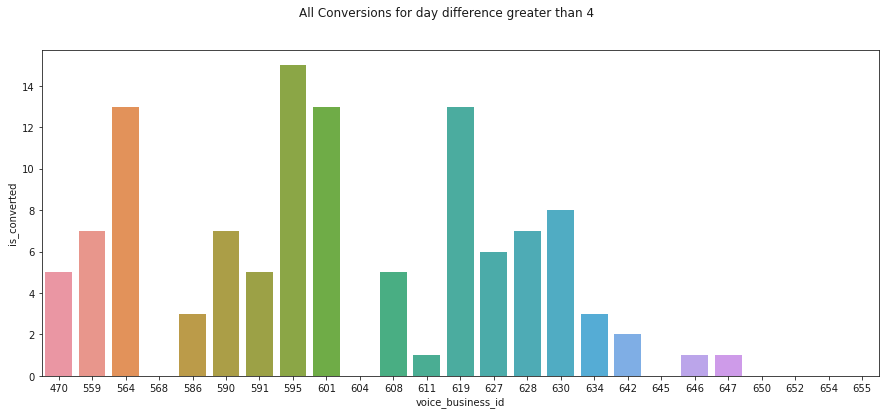

<Figure size 432x288 with 0 Axes>

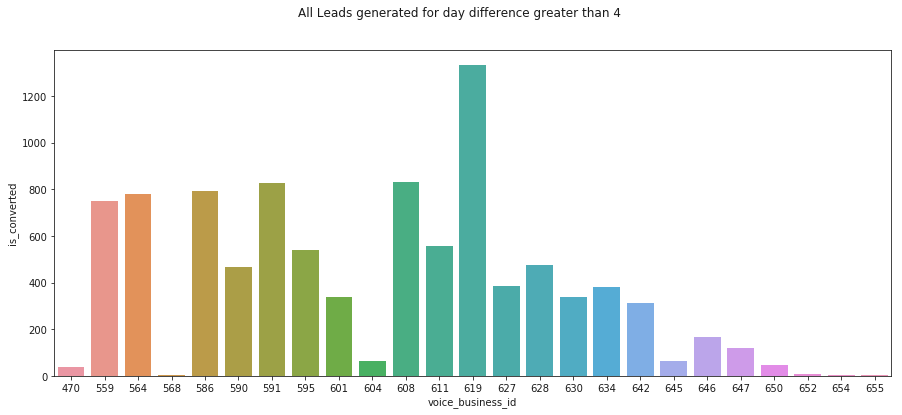

In [804]:
plt.figure(figsize=(15,6))

from matplotlib import interactive

plt.figure(1)
sns.barplot(subset_b_id_sum.index, subset_b_id_sum.is_converted)
plt.suptitle("All Conversions for day difference greater than 4")

interactive(True)
plt.show()


plt.figure(2)
plt.figure(figsize=(15,6))
sns.barplot(subset_b_id_count.index, subset_b_id_count.is_converted)
plt.suptitle("All Leads generated for day difference greater than 4")
interactive(False)
plt.show()

#### From the above plots we can see that a lot of the business_id's deal with the leads after 4 days but their conversion is not what could have been if they would have dealt with it on day 1 but there are also some business_ids which are dealing with the data after 4 days but their conversion rate is better. 

### The next steps from a business point of view would be to focus on 595, 630, 590, 601 business ids because there is a lot of conversion potential in these businesses.

#### As a Data Analyst the next step would be to model this data and predict based on a few of the used features what the conversion rate is going to be and for what business id, so that we can provide more leads to that business_id.